In [ ]:
#!/usr/bin/env python
"""
evalute the results of experiment.

@authors: Ji Hyea Park
"""

In [25]:
import csv
import numpy as np

sbc = 0
white = 1

L_PROBES_TW = np.linspace(0.1, 0.4, 6).round(2)
L_PROBES_TB = np.linspace(0.6, 0.9, 6).round(2)

L_PROBES_ZU_W = [0.53, 0.56]
L_PROBES_ZU_S = [0.93, 0.96]

LUMINANCES = [L_PROBES_TW.tolist(), L_PROBES_TB.tolist()]

STIM_TYPES = [sbc, white]

SESSIONS = ['E-Papier', 'DataPixx']

In [26]:
def get_counts_zusatz(NAME, DATE, stim, session):
    file_name = f'{NAME}_{DATE}_2afc-{stim}.results.csv'
    
    if session == SESSIONS[0]: #E-Papier
        file_name = f'{NAME}_{DATE}_{stim}.results.csv'
        
    path = f'../{session}/2AFC_experiment/data/results/{NAME}/{file_name}'
    # path = f'..\\{session}\\2AFC_experiment\\data\\results\\{NAME}\\{file_name}'
    
    file = open(path, "r")
    d_results = list(csv.DictReader(file))
    file.close()

    response = 'response'

    if session == SESSIONS[0]:
        response = 'isBrighter'
        
    bs = []
    b_sorted = [[],[]]

    b_count = [[], []]

    for item in d_results:
        if item['target_bg'] == 'b':
            bs.append(item)
    
    for b in bs:
        if stim == sbc:
            for l_id in np.arange(0, len(L_PROBES_ZU_S)):
                if b['l_probe'] == f'{L_PROBES_ZU_S[l_id]}':
                    b_sorted[l_id].append(b)
        elif stim == white:
            for l_id in np.arange(0, len(L_PROBES_ZU_W)):
                if b['l_probe'] == f'{L_PROBES_ZU_W[l_id]}':
                    b_sorted[l_id].append(b)

    for b in b_sorted:
        left = 0
        right = 0
        for b_id in np.arange(0, len(b)):
            if b[b_id][response].upper() == 'LEFT':
                left += 1
            elif b[b_id][response].upper() == 'RIGHT':
                right += 1
        b_count[0].append(left)
        b_count[1].append(right)
    
    print(b_count)
    ## b: right/(left+right)
    b_ = [r / (l + r) for l, r in zip(b_count[0], b_count[1])]

    b_p = [item * 100 for item in b_]

    return b_p

In [27]:
def get_counts(NAME, DATE, stim, session):
    file_name = f'{NAME}_{DATE}_2afc-{stim}.results.csv'

    if session == SESSIONS[0]: 
        #E-Papier
        file_name = f'{NAME}_{DATE}_{stim}.results.csv'

    # path = f'..\\{session}\\2AFC_experiment\\data\\results\\{NAME}\\{file_name}'
    path = f'../{session}/2AFC_experiment/data/results/{NAME}/{file_name}'

    file = open(path, "r")
    d_results = list(csv.DictReader(file))
    file.close()

    response = 'response'

    if session == SESSIONS[0]:
        response = 'isBrighter'

    bs = []
    b_sorted = [[],[],[],[],[],[]]

    ws = []
    w_sorted = [[],[],[],[],[],[]]

    b_count = [[], []]
    w_count = [[], []]

    for item in d_results:
        if item['target_bg'] == 'b':
            bs.append(item)
        if item['target_bg'] == 'w':
            ws.append(item)

    for w in ws:
        for l_id in np.arange(0, len(LUMINANCES[0])):
            if w['l_probe'] == f'{LUMINANCES[0][l_id]}':
                w_sorted[l_id].append(w)
    
    for b in bs:
        for l_id in np.arange(0, len(LUMINANCES[1])):
            if b['l_probe'] == f'{LUMINANCES[1][l_id]}':
                b_sorted[l_id].append(b)

    for w in w_sorted:
        left = 0
        right = 0
        for w_id in np.arange(0, len(w)):
            if w[w_id][response].upper() == 'LEFT':
                left += 1
            elif w[w_id][response].upper() == 'RIGHT':
                right += 1
        w_count[0].append(left)
        w_count[1].append(right)

    for b in b_sorted:
        left = 0
        right = 0
        for b_id in np.arange(0, len(b)):
            if b[b_id][response].upper() == 'LEFT':
                left += 1
            elif b[b_id][response].upper() == 'RIGHT':
                right += 1
        b_count[0].append(left)
        b_count[1].append(right)

    ## w: left/(left+right)
    ## b: right/(left+right)
    w_ = [l / (l + r) for l, r in zip(w_count[0], w_count[1])]
    b_ = [r / (l + r) for l, r in zip(b_count[0], b_count[1])]

    w_p = [item * 100 for item in w_]
    b_p = [item * 100 for item in b_]

    return w_p, b_p

In [28]:
def evaluate(NAME, DATE):
    results = []

    if NAME == 'JP':
        # E-PAPIER
        results.append(get_counts(NAME, '20231030', sbc, SESSIONS[0]))
        # MONITOR
        results.append(get_counts(NAME, DATE, sbc, SESSIONS[1]))
        # E-PAPIER
        results.append(get_counts(NAME, '20231030', white, SESSIONS[0]))
        # MONITOR
        results.append(get_counts(NAME, DATE, white, SESSIONS[1]))
        results.append(get_counts_zusatz('JP-ZUSATZ', '20231114', sbc, SESSIONS[1]))
        results.append(get_counts_zusatz('JP-ZUSATZ', '20231113', white, SESSIONS[0]))
        # output:
        # ..
        # (m_Tb_sbc_zusatz),
        # (e_Tb_white_zusatz)
    else:
        for i in (0,1):
            for session in SESSIONS:
                results.append(get_counts(NAME, DATE, i, session))
                # output: 
                # (e_Tw_sbc, e_Tb_sbc), 
                # (m_Tw_sbc, m_Tb_sbc), 
                # (e_Tw_white, e_Tb_white), 
                # (m_Tw_white, m_Tb_white)    
        if NAME == 'GA':
            results.append(get_counts_zusatz('GA-ZUSATZ', '20231114', sbc, SESSIONS[1]))
            # output:
            # ..
            # (m_Tb_sbc_zusatz)
        
    return results

In [29]:
dates = {
    'SL': '20231113',
    'GA': '20231103',
    'JP': '20231031'
}

results = {
    'SL': evaluate('SL', dates['SL']),
    'GA': evaluate('GA', dates['GA']),
    'JP': evaluate('JP', dates['JP'])
}

colors = {
    'SL': [170/255,105/255,0],
    'GA': [170/255,0,105/255],
    'JP': [0,105/255,170/255]
}

name = 'JP'
color = colors[name]

result = results[name]

e_Tw_sbc = result[0][0]
e_Tb_sbc = result[0][1]
m_Tw_sbc = result[1][0]
m_Tb_sbc = result[1][1]
e_Tw_white = result[2][0]
e_Tb_white = result[2][1]
m_Tw_white = result[3][0]
m_Tb_white = result[3][1]

if name == 'JP' or name == 'GA':
    m_Tb_sbc = m_Tb_sbc + result[4]
    
if name == 'JP':
    e_Tb_white = result[5] + e_Tb_white

[[4, 0], [6, 10]]
[[7, 0], [3, 10]]
[[7, 5], [3, 5]]


### Plot psychometric function, get point of subjective equality (PSE) and get a 95% confidence interval of PSE.

In [31]:
import psignifit as ps
# https://github.com/wichmann-lab/python-psignifit
# install by running pip:
# pip install https://github.com/wichmann-lab/python-psignifit/zipball/master

def plot_evaluation(name, color, l_intervall, evaluated_data):
    # data arrangment
    ## Tw, e-paper, sbc
    data = np.zeros((len(l_intervall), 3))

    nrepeats = 10 # how many repeats there were per value

    # first column is the x values, in this case relative luminance 
    data[:, 0] = l_intervall
    # second column is the times the answer was provided
    data[:, 1] = np.array(evaluated_data)/10
    # third column is the total of repeats
    data[:, 2] = nrepeats

    # Note: so percentage is calculated by dividing the second over the 
    # third column. Psignifit takes as input not the percentage but
    # how many answers (2nd column) over how many (3rd column) were done,
    # becuase in terms of variability it is not the same 1 on 10 than 10 on 100.
    # probability wise is the same (0.1), but the binomial variability is not.

    print(data)

    # set options for psignifit
    options = {}
    options['sigmoidName'] = 'norm'   # choose a cumulative Gauss as the sigmoid  
    options['expType']     = 'YesNo'   # enables the function to go from 0 to 1.

    # fit
    result = ps.psignifit(data, options)

    # plotting
    ps.psigniplot.plotPsych(result, dataColor=color, xLabel='Reflexionsgrad der Probe', yLabel='Proportion von $\it{Probe Gewählt}$', labelSize=12)

    # the PSE is the first value in the vector result[Fit]
    print('PSE', result['Fit'][0])

    # and its confidence interval are
    print(result['conf_Intervals'][0])

    # for 95%, 90% and 68% confidence. We take the 95 %  as its convention
    print('95% confidence interval for the PSE is:')
    conf_interval = result['conf_Intervals'][0][:, 0]
    print(conf_interval)

    return conf_interval

[[ 0.1   4.   10.  ]
 [ 0.16  9.   10.  ]
 [ 0.22 10.   10.  ]
 [ 0.28 10.   10.  ]
 [ 0.34 10.   10.  ]
 [ 0.4  10.   10.  ]]
(array([], dtype=int64),)


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


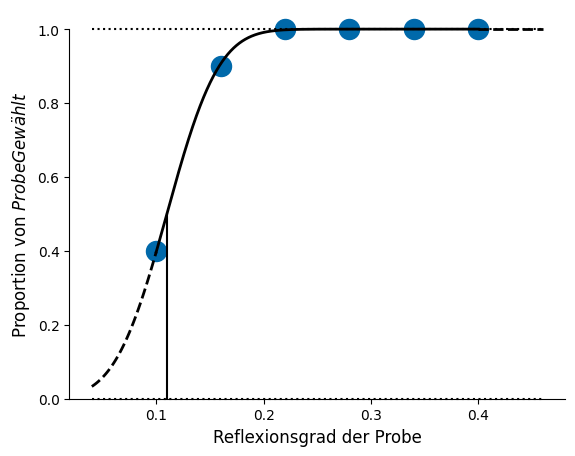

PSE 0.10990326622815805
[[0.03207251 0.04654299 0.07326925]
 [0.14321938 0.13635263 0.12294472]]
95% confidence interval for the PSE is:
[0.03207251 0.14321938]
[[ 0.6   0.   10.  ]
 [ 0.66  0.   10.  ]
 [ 0.72  0.   10.  ]
 [ 0.78  1.   10.  ]
 [ 0.84  0.   10.  ]
 [ 0.9   8.   10.  ]]
(array([], dtype=int64),)


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


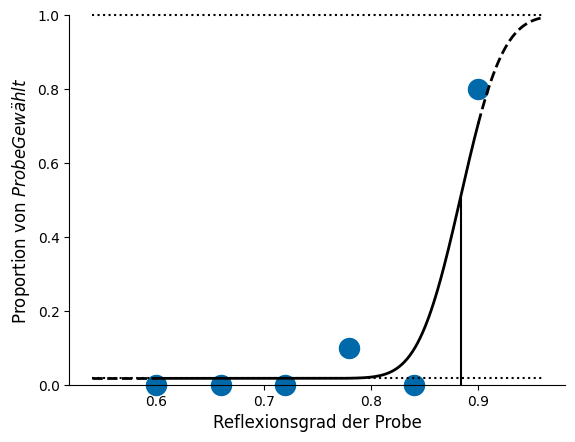

PSE 0.8835774662863756
[[0.84599382 0.85278696 0.86582811]
 [0.95228735 0.93634684 0.90970204]]
95% confidence interval for the PSE is:
[0.84599382 0.95228735]
[[ 0.1  10.   10.  ]
 [ 0.16 10.   10.  ]
 [ 0.22 10.   10.  ]
 [ 0.28 10.   10.  ]
 [ 0.34 10.   10.  ]
 [ 0.4  10.   10.  ]]
(array([], dtype=int64),)


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


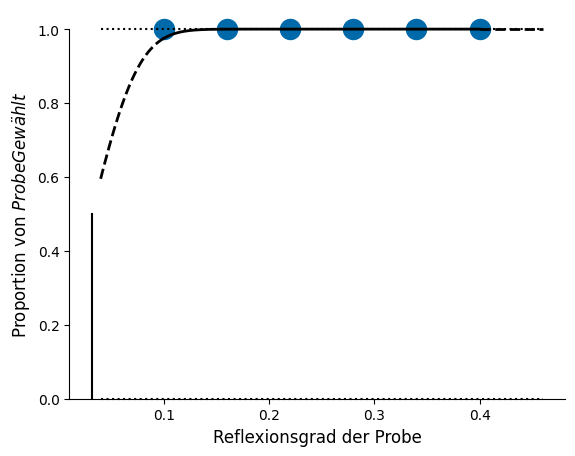

PSE 0.031611605080925836
[[-0.02758809 -0.02118984 -0.005287  ]
 [ 0.07418666  0.06708849  0.05088842]]
95% confidence interval for the PSE is:
[-0.02758809  0.07418666]
[[ 0.6   0.   10.  ]
 [ 0.66  1.   10.  ]
 [ 0.72  0.   10.  ]
 [ 0.78  0.   10.  ]
 [ 0.84  0.   10.  ]
 [ 0.9   5.   10.  ]
 [ 0.93  3.   10.  ]
 [ 0.96 10.   10.  ]]
(array([], dtype=int64),)


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


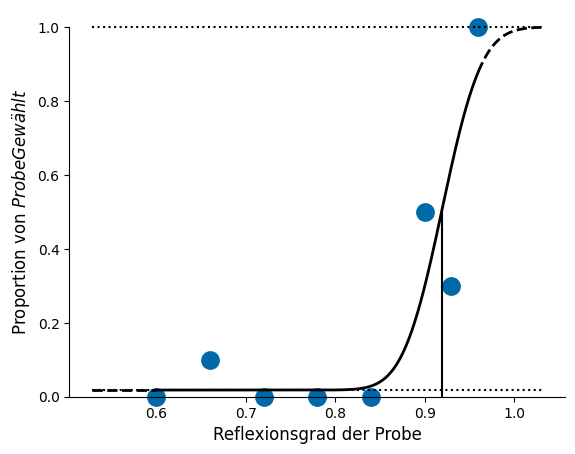

PSE 0.9197024857721847
[[0.88297433 0.8901034  0.90245156]
 [0.95936254 0.94815971 0.93352633]]
95% confidence interval for the PSE is:
[0.88297433 0.95936254]
[[ 0.1   0.   10.  ]
 [ 0.16  0.   10.  ]
 [ 0.22  0.   10.  ]
 [ 0.28  0.   10.  ]
 [ 0.34  0.   10.  ]
 [ 0.4   6.   10.  ]]
(array([], dtype=int64),)


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


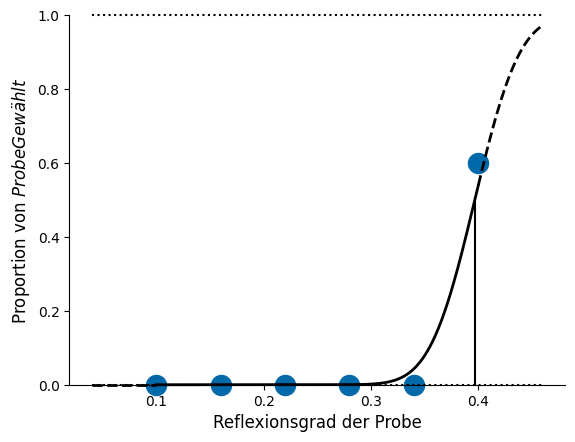

PSE 0.39671456564415186
[[0.36645313 0.37256243 0.38455416]
 [0.47199459 0.45722101 0.42996976]]
95% confidence interval for the PSE is:
[0.36645313 0.47199459]
[[ 0.53  3.   10.  ]
 [ 0.56  5.   10.  ]
 [ 0.6   7.   10.  ]
 [ 0.66  9.   10.  ]
 [ 0.72 10.   10.  ]
 [ 0.78 10.   10.  ]
 [ 0.84 10.   10.  ]
 [ 0.9  10.   10.  ]]
(array([], dtype=int64),)


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


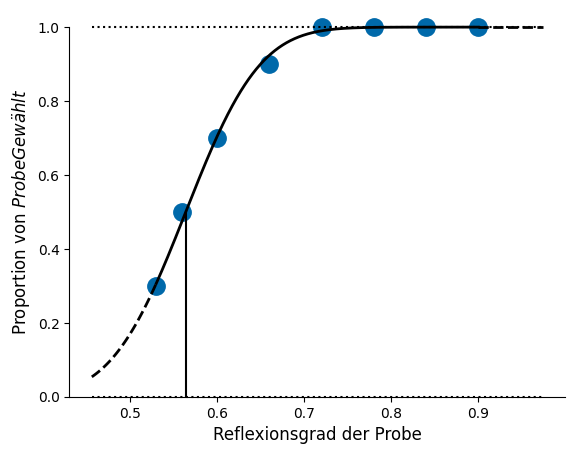

PSE 0.56393010081156
[[0.50122869 0.51498155 0.53911311]
 [0.6107566  0.60214155 0.58596214]]
95% confidence interval for the PSE is:
[0.50122869 0.6107566 ]
[[ 0.1   0.   10.  ]
 [ 0.16  1.   10.  ]
 [ 0.22  1.   10.  ]
 [ 0.28  2.   10.  ]
 [ 0.34  8.   10.  ]
 [ 0.4  10.   10.  ]]
(array([], dtype=int64),)


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


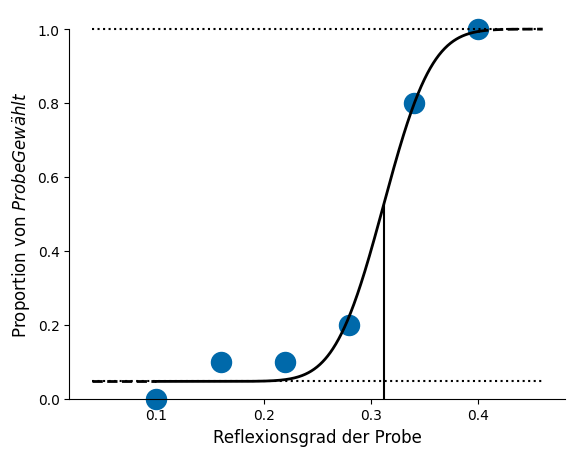

PSE 0.3117032209584528
[[0.2662614  0.27375741 0.28809555]
 [0.34224494 0.33569149 0.32396577]]
95% confidence interval for the PSE is:
[0.2662614  0.34224494]
[[ 0.6   3.   10.  ]
 [ 0.66  2.   10.  ]
 [ 0.72  8.   10.  ]
 [ 0.78 10.   10.  ]
 [ 0.84 10.   10.  ]
 [ 0.9  10.   10.  ]]
(array([], dtype=int64),)


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


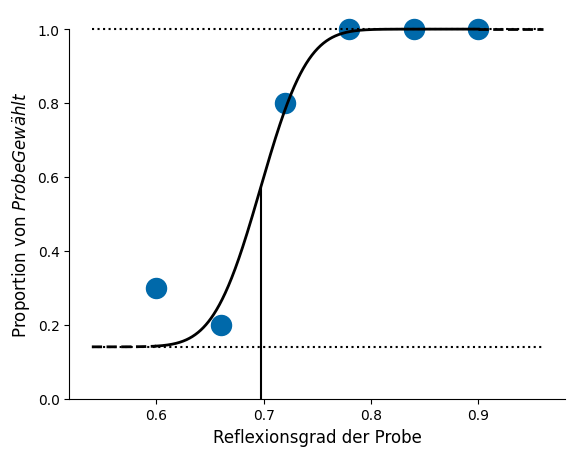

PSE 0.6971601538668407
[[0.62137397 0.6341312  0.65543918]
 [0.72584129 0.71897473 0.70502914]]
95% confidence interval for the PSE is:
[0.62137397 0.72584129]


In [32]:
### SBC
## Tw, e-paper, sbc
res_e_Tw_sbc = plot_evaluation(name, color, LUMINANCES[0], e_Tw_sbc)
## e-papier, Tb, sbc
res_e_Tb_sbc = plot_evaluation(name, color, LUMINANCES[1], e_Tb_sbc)
# monitor, Tw, sbc
res_m_Tw_sbc = plot_evaluation(name, color, LUMINANCES[0], m_Tw_sbc)
## Monitor, Tb, sbc, + (JP/GA-ZUSATZ)
l_intervall = LUMINANCES[1]
if name == 'JP' or name == 'GA':
    l_intervall = LUMINANCES[1] + L_PROBES_ZU_S
res_m_Tb_sbc = plot_evaluation(name, color, l_intervall, m_Tb_sbc)

### WHITE
## E-Papier, Tw, White
res_e_Tw_white = plot_evaluation(name, color, LUMINANCES[0], e_Tw_white)
## E, Tb, White
l_intervall = LUMINANCES[1]
if name == 'JP':
    l_intervall = L_PROBES_ZU_W + LUMINANCES[1]
res_e_Tb_white = plot_evaluation(name, color, l_intervall, e_Tb_white)
## M, Tw, White
l_intervall = LUMINANCES[0]
res_m_Tw_white = plot_evaluation(name, color, LUMINANCES[0], m_Tw_white)
## M, Tb, white
l_intervall = LUMINANCES[1]
res_m_Tb_white = plot_evaluation(name, color, LUMINANCES[1], m_Tb_white)

## Vergleich Ergebnissen
Plot confidence interval for PSE

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import statistics

colors = {
    'SL': [170/255,105/255,0],
    'GA': [170/255,0,105/255],
    'JP': [0,105/255,170/255]
}

results = {
    'JP': [[0.03207251, 0.14321938],
           [0.84599382, 0.95228735],
           [-0.02758809, 0.07418666],
           [0.88297433, 0.95936254],
           [0.36645313, 0.47199459],
           [0.50122869, 0.6107566],
           [0.2662614,  0.34224494],
           [0.62137397, 0.72584129]],
    'GA': [[0.17990423, 0.23794822],
           [0.83239328, 0.94832133],
           [0.15632062, 0.21313604],
           [0.89625437, 0.93674057],
           [0.31284618, 0.38241645],
           [0.59850677, 0.69343471],
           [0.33407621, 0.39899523],
           [0.67631194, 0.73010574]],
    'SL': [[0.01468551, 0.12596096],
           [0.73542615, 0.79554238],
           [-0.02051589, 0.09563235],
           [0.8090988, 0.89054529],
           [0.17815232, 0.29695994],
           [0.60337712, 0.67540384],
           [0.2653263, 0.34829112],
           [0.63169101, 0.70046288]]
}

result = results[name]

e_Tw_sbc = result[0]
e_Tb_sbc = result[1]
m_Tw_sbc = result[2]
m_Tb_sbc = result[3]
e_Tw_white = result[4]
e_Tb_white = result[5]
m_Tw_white = result[6]
m_Tb_white = result[7]

In [34]:
def plot_confidence_interval(x, values, z=1.96, color_=[0,0,0], horizontal_line_width=0.25):
    mean = statistics.mean(values)
    stdev = statistics.stdev(values)
    confidence_interval = z * stdev / np.sqrt(len(values))

    left = x - horizontal_line_width / 2
    top = mean - confidence_interval
    right = x + horizontal_line_width / 2
    bottom = mean + confidence_interval
    plt.plot([x, x], [top, bottom], color=color_)
    plt.plot([left, right], [top, top], color=color_)
    plt.plot([left, right], [bottom, bottom], color=color_)
    plt.plot(x, mean, 'o', color=color, markersize=15)
    plt.ylabel('Point of Subjective Equality (PSE)', fontsize=12, labelpad=15)
    plt.yticks(fontsize=11)
    plt.minorticks_on()

    return mean, confidence_interval

In [35]:
def show_plot(name, type, stim_type, data1, data2):
    plt.xticks([1, 2], ['E-Papier','Bildschirm'], fontsize=12)
    plt.suptitle('95% Konfidenzintervall')
    plot_confidence_interval(1, data1)
    plot_confidence_interval(2, data2)
    plt.show()

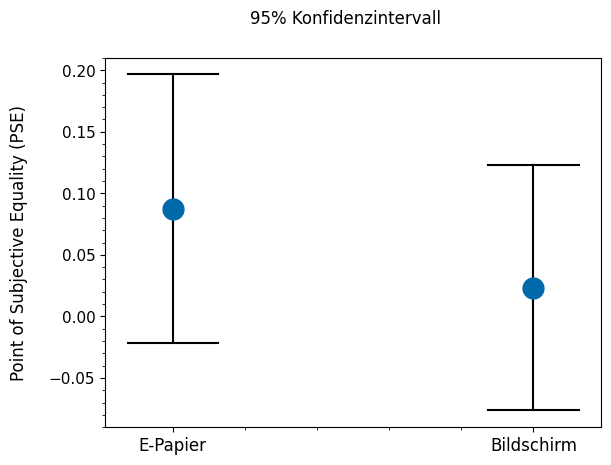

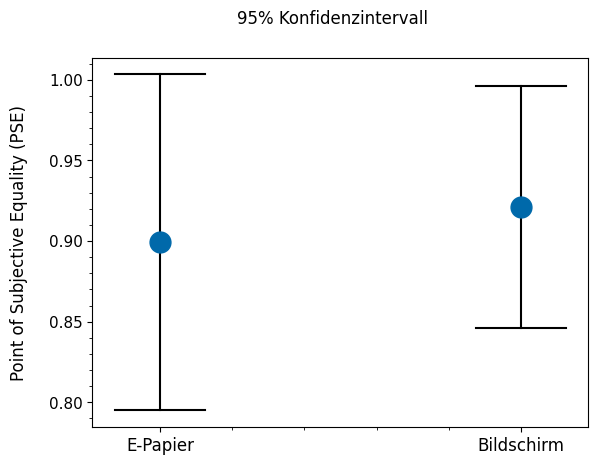

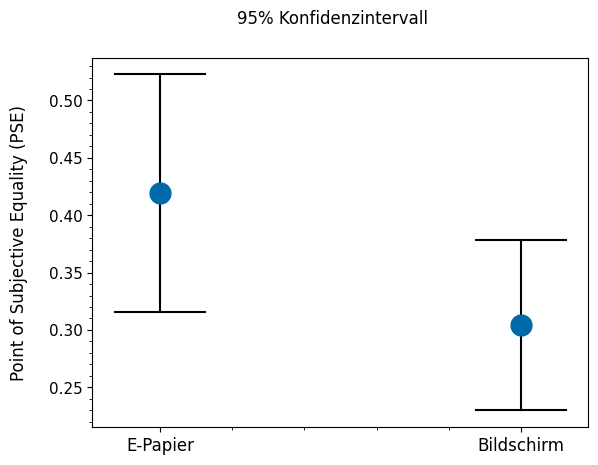

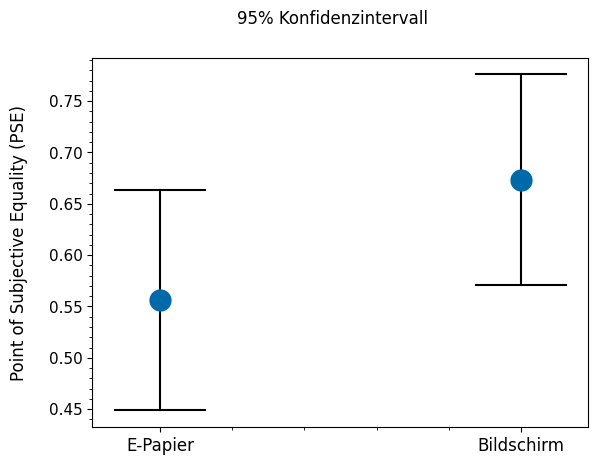

In [36]:
# Tw, sbc
show_plot(name, 'White', 'SBC', e_Tw_sbc, m_Tw_sbc)
# Tb, SBC
show_plot(name, 'Black', 'SBC', e_Tb_sbc, m_Tb_sbc)
# Tw, White
show_plot(name, 'White', 'White', e_Tw_white, m_Tw_white)
# Tb, White
show_plot(name,  'Black', 'White', e_Tb_white, m_Tb_white)